# DOMAIN: Transportation

# NYC Taxi Trip Duration

**By Gaurav Padawe** - 24th October, 2018

The dataset is based on the **2016 NYC Yellow Cab trip record** data made available in **Big Query** on **Google Cloud Platform**. The data was originally published by the **NYC Taxi and Limousine Commission (TLC)**. The data was sampled and cleaned for the purposes of this playground. Based on individual trip attributes, should predict the duration of each trip.

# Source:

- **NYC Taxi and Limousine Commission (TLC)** : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml


- **Kaggle** : https://www.kaggle.com/c/nyc-taxi-trip-duration/data

# Details

File descriptions
●	train.csv - the dataset (contains 1458644 trip records)


Data fields

●	id - a unique identifier for each trip

●	vendor_id - a code indicating the provider associated with the trip record

●	pickup_datetime - date and time when the meter was engaged

●	dropoff_datetime - date and time when the meter was disengaged

●	passenger_count - the number of passengers in the vehicle (driver entered value)

●	pickup_longitude - the longitude where the meter was engaged

●	pickup_latitude - the latitude where the meter was engaged

●	dropoff_longitude - the longitude where the meter was disengaged

●	dropoff_latitude - the latitude where the meter was disengaged

●	store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

●	trip_duration - duration of the trip in seconds


# Objective:

**Build a model that predicts the total trip duration of taxi trips in New York City.**


# Questions Arising:


- What story Spatial data has for us ?


- Are there any Missing Values ?


- What types of Variables do we have ?


- Do we’ve False trips which exceeds Trip Duration well above impossibility ?


- What’s the most frequent travelled destination ?

And much more to know as we continue with Analysis. 

# Setting the Path and Loading Required Libraries

In [44]:
path = "D:/Data Science/DS Prac/ML Algo/ML Project datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/"

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
nyc_taxi = pd.read_csv(path+"train.csv", header=0, parse_dates=True)
nyc_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Findings

- We found that vendor_id takes couple of values , meaning 2 service providers.


- DateTime columns for Pickup and Dropoff which needs feature extraction as there might be lots of hidden info.


- Longitude/Latitude stating Geo-Spatial data.

# Checking for Dtype and Null Values

In [47]:
nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- Quite good that our Dataset has no NULL values !!

# EDA

Text(0.5,1,'Vendor ID')

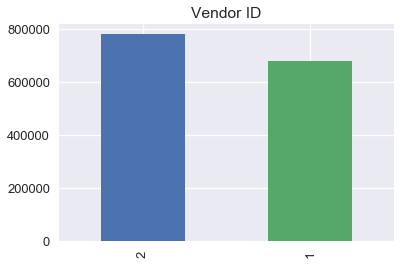

In [48]:
sns.set()
sns.set_context('talk')
nyc_taxi['vendor_id'].value_counts().plot(kind="bar")
plt.title("Vendor ID")

- From Above Visualization, we can say that there are 2 vendors (Service Providers).


- 2nd Service provider is the most opted one by New Yorkers.

Text(0.5,1,'Store and Forward Flag')

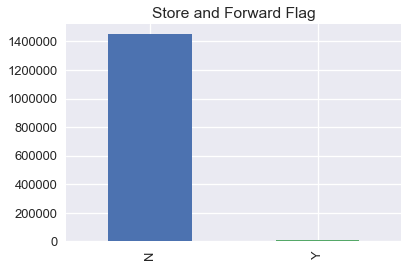

In [49]:
nyc_taxi['store_and_fwd_flag'].value_counts().plot(kind="bar")
plt.title("Store and Forward Flag")

- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.


- Visualization tells us that there were very few trips of which the records were stored as of no connection to the server.

# Label Encoding Columns having Categorical Values

In [50]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
nyc_taxi['store_and_fwd_flag'] = enc.fit_transform(nyc_taxi['store_and_fwd_flag'])
nyc_taxi['vendor_id'] = enc.fit_transform(nyc_taxi['vendor_id'])

#nyc_taxi['vendor_id'] = nyc_taxi['vendor_id'].astype('category')
#nyc_taxi['store_and_fwd_flag'] = nyc_taxi['store_and_fwd_flag'].astype('category')

- Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease.


- We can convert these features into “category” type by function called “astype(‘category’)” that will speed up the Computation. Since, my plan is to go with PCA for dimension reduction, I’m not going with that approach.

# Describing the Data

In [51]:
nyc_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,5.349503e-01,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,5.515396e-03,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,7.406066e-02,5.237432e+03
min,0.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,0.000000e+00,3.970000e+02
50%,1.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,0.000000e+00,6.620000e+02
75%,1.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,0.000000e+00,1.075000e+03
max,1.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,3.526282e+06


- We can see that there were trips having 0 passengers which we can consider as false trip.


- Alongside, we can also see that there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

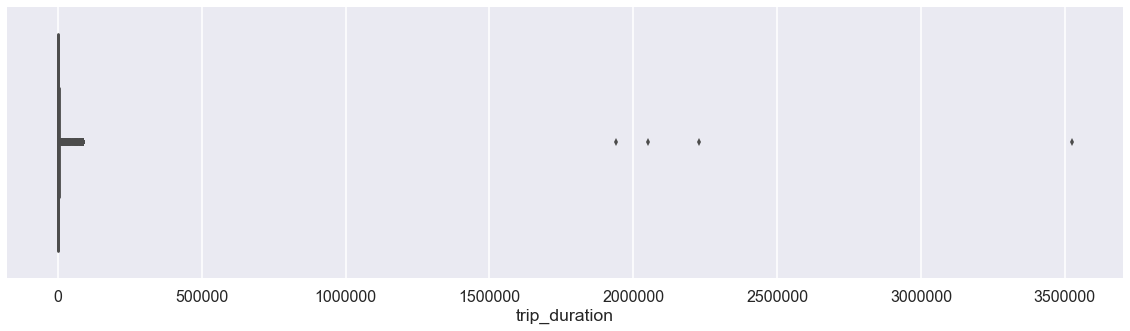

In [52]:
#Visualising Trip duration we can clearly notice few outliers at extreme right
sns.set_context('poster')
plt.figure(figsize=(20,5))
sns.boxplot(nyc_taxi['trip_duration'])

- Probably in this visualization we can clearly see some outliers , their trips are lasting between 1900000 seconds (528 Hours) to somewhere around 3500000 (972 hours) seconds which is impossible in case of taxi trips , How can a taxi trip be that long ?


- It’s Quite suspicious. We’ll have to get rid of those Outliers or else it’ll affect our model’s performance.

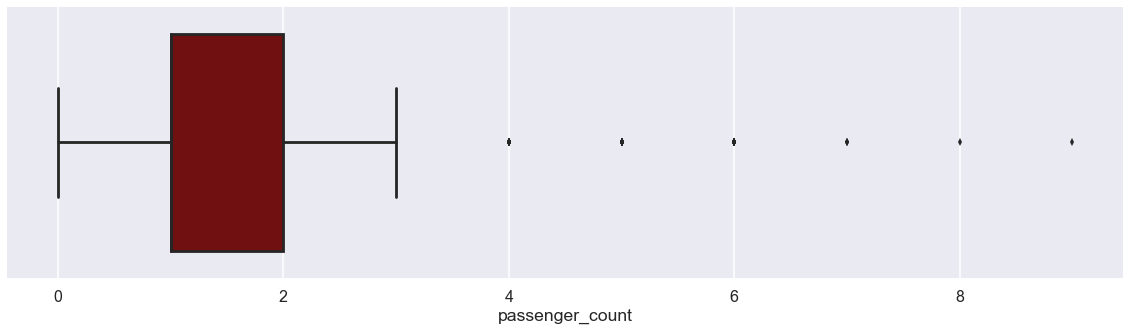

In [53]:
sns.set_context('poster')
plt.figure(figsize=(20,5))
sns.boxplot(nyc_taxi['passenger_count'], color='maroon')

- Most number of trips are done by single or double passengers.


- But one thing is Interesting to observe, there exist trip with ZERO passengers, was that a free ride ? Or just a False data recorded ?

Text(0.5,1,'Logarithmic Trip Duration')

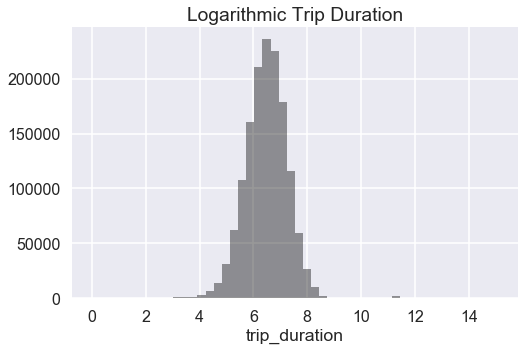

In [54]:
plt.figure(figsize=(8,5))
sns.distplot(np.log(nyc_taxi['trip_duration']), kde=False, color='black')
plt.title("Logarithmic Trip Duration")

- By Taking Logarithm of Trip duration we can even out those outliers which could had possibly affected our model. Now, Log. Trip Duration is our Target to Predict.

# Geo Spatial Data

- Now, we also have Geographical data as in Latitude and Longitude for pickup points and dropoff points.


- You can refer to my Tableau profile for geographical data analysis here: https://public.tableau.com/profile/gaurav.padawe#!/vizhome/NYCTaxiTripAnalysis2016/NYCTaxi-DropoffPoint


- I had created Interactive dashboard where you can choose filter from "vendor_id", "month" and "hour".


- There are total 2 plots , a 'pickup' and a 'dropoff' point plot.


1) **vendor_id** filter will let you choose the specific service provider and analyse its insights throughout the period of time.


2) **month** filter will let you choose specific month to get insights on monthly basis.


3) **hour** filter permits you to observe patterns / trends in trips on hourly basis.

**PICKUP** Points analysis

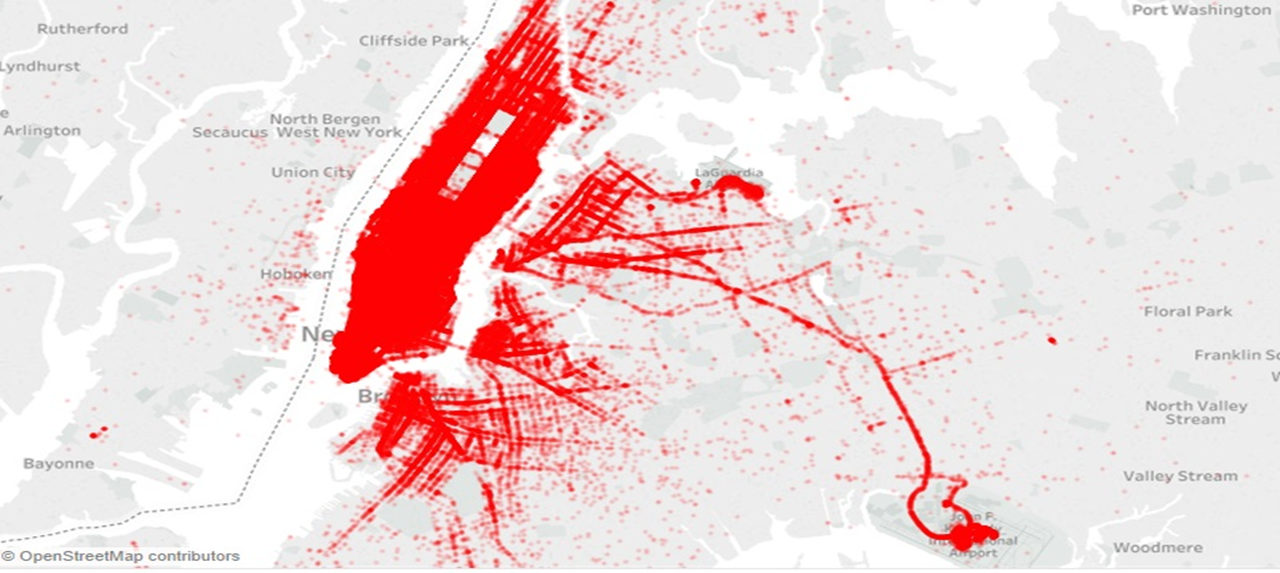

- Pickup Points over the period of time, Apart from Manhattan we’ve some areas where we see most pickups, The **LA Guardia Airport** and **JFK Airport**.

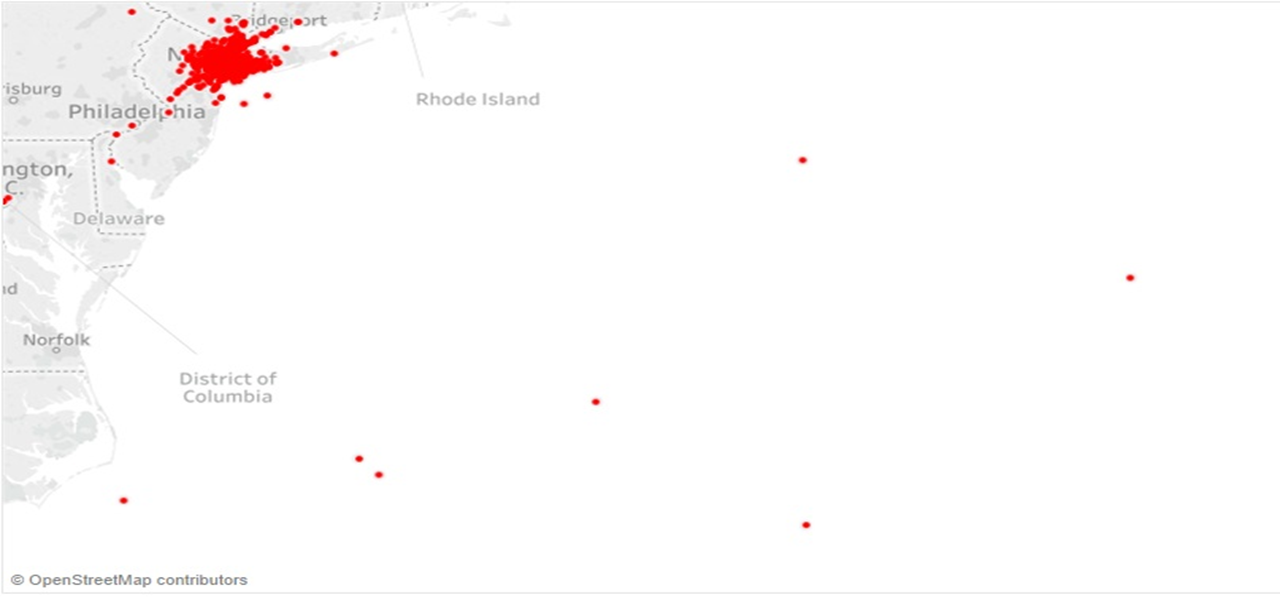

- Some the pickup points reach far beyond the Land , probably in Sea which is kind of impossible, how can a taxi trip begin in Ocean ?

**DROPOFF** Points Analysis

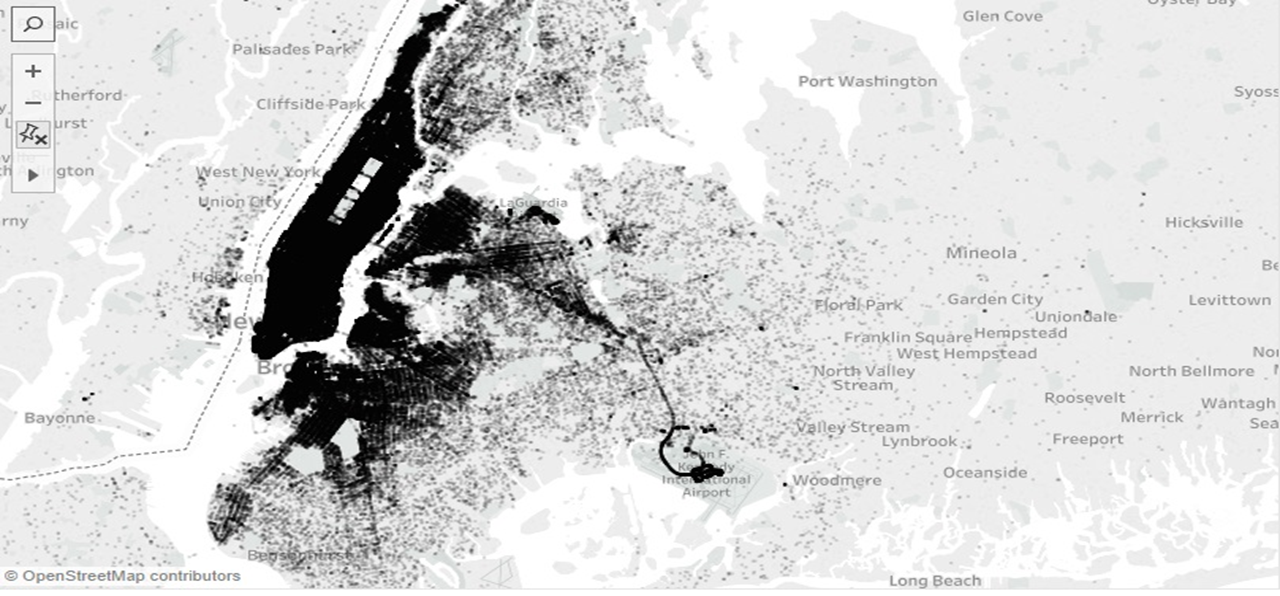

- DropOff Points Visualization: Leaving Manhattan area, the place where we see more DropOffs are Airports , The **LA Guardia Airport** and **JFK Airport**.

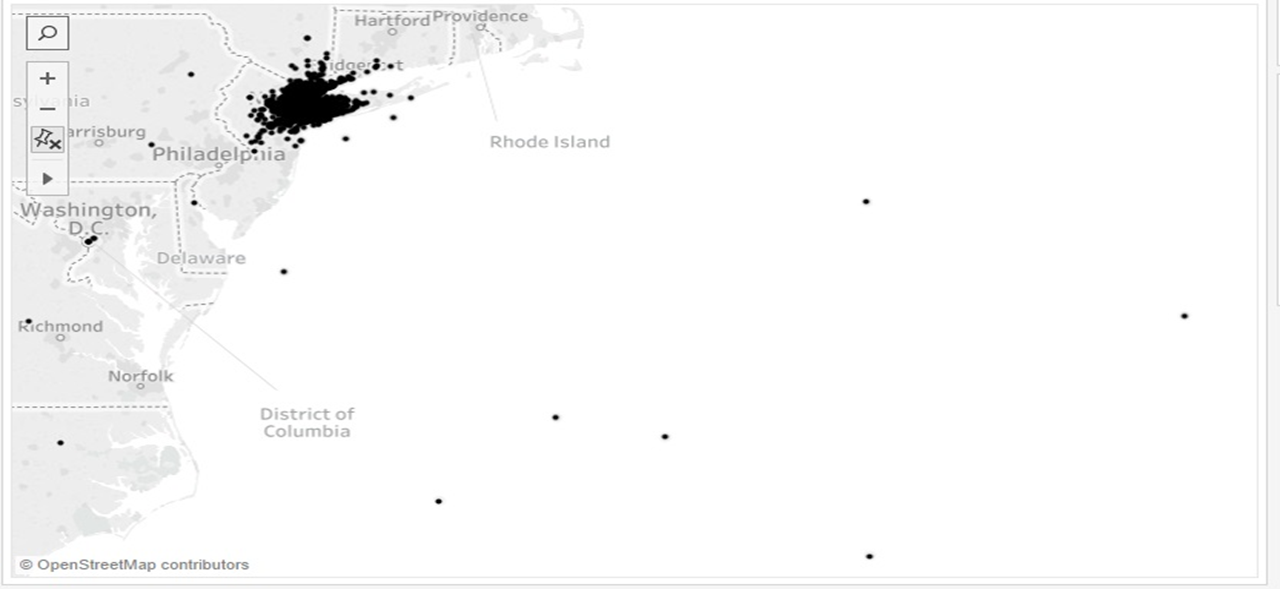

- It’s evident from the above pickup and dropoff points which lead in the North Atlantic Sea, maybe these points responsible for 350000 seconds (972 Hours) trip duration, possibly an outliers.

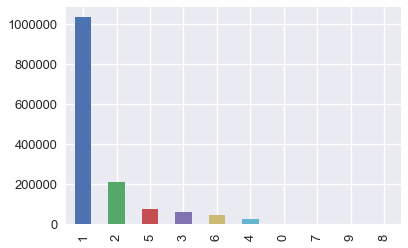

In [55]:
sns.set_context("talk")
nyc_taxi['passenger_count'].value_counts().plot(kind="bar")

- Above viz. tells us that there were lot more number of trips carried out by Single passenger, followed by 2 passengers and 5 passengers.


- 5 and 6 passengers trip states us that cab must be a Large vehicle. 

# Feature Engineering

In [56]:
nyc_taxi['pickup_datetime'] = pd.to_datetime(nyc_taxi['pickup_datetime'])
nyc_taxi['dropoff_datetime'] = pd.to_datetime(nyc_taxi['dropoff_datetime'])

nyc_taxi['pickup_day'] = nyc_taxi['pickup_datetime'].dt.day
nyc_taxi['pickup_month'] = nyc_taxi['pickup_datetime'].dt.month
nyc_taxi['pickup_date'] = nyc_taxi['pickup_datetime'].dt.date
nyc_taxi['pickup_hour'] = nyc_taxi['pickup_datetime'].dt.hour
nyc_taxi['pickup_min'] = nyc_taxi['pickup_datetime'].dt.minute
nyc_taxi['pickup_weekday'] = nyc_taxi['pickup_datetime'].dt.weekday

nyc_taxi['dropoff_min'] = nyc_taxi['dropoff_datetime'].dt.minute

- The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features. 


- We do not have to fetch pickup and dropoff time both, as they may lead to strong positive co-relation in the respective fetched features.


- Further we can use these columns for Analysis.

Text(0.5,1,'Monthly trips bar plot')

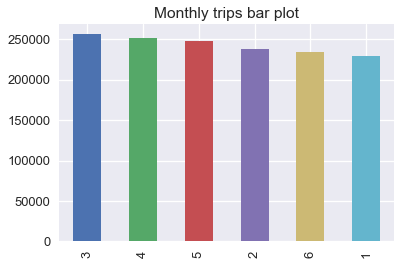

In [57]:
nyc_taxi['pickup_month'].value_counts().plot(kind="bar")
plt.title('Monthly trips bar plot')

- Number of trips in a particular month - March and April marking the highest.


- January being lowest maybe due to SnowFall.

Text(0.5,1,'Hourly Trips bar plot')

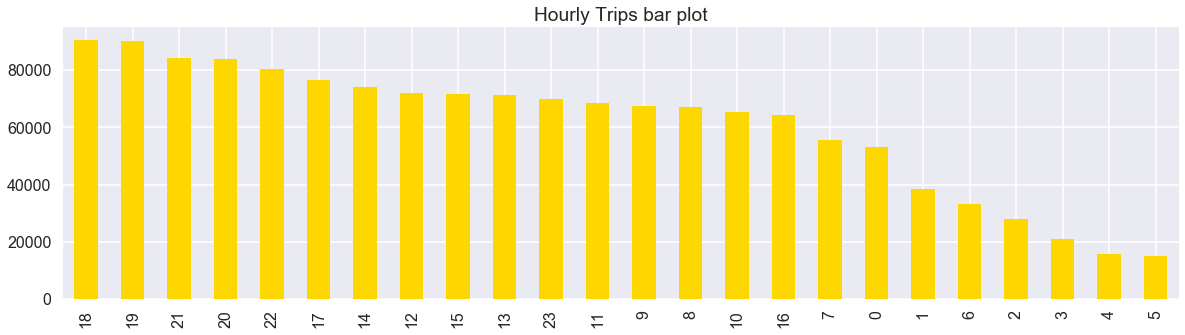

In [58]:
sns.set_context('poster')
plt.figure(figsize=(20,5))
nyc_taxi['pickup_hour'].value_counts().plot(kind="bar", color="gold")
plt.title("Hourly Trips bar plot")

- In which hour we get to see maximum trips ? - Rush hours (4 pm to 8 pm)

Text(0.5,1,'Week day Trips bar plot')

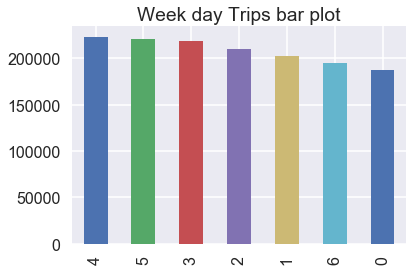

In [59]:
nyc_taxi['pickup_weekday'].value_counts().plot(kind="bar")
plt.title('Week day Trips bar plot')

- Observations says that Friday’s and Saturday’s are those days in a week when New Yorkers prefer to get out of their home. GREAT !!

Text(0.5,1,'Daily Trips Plot')

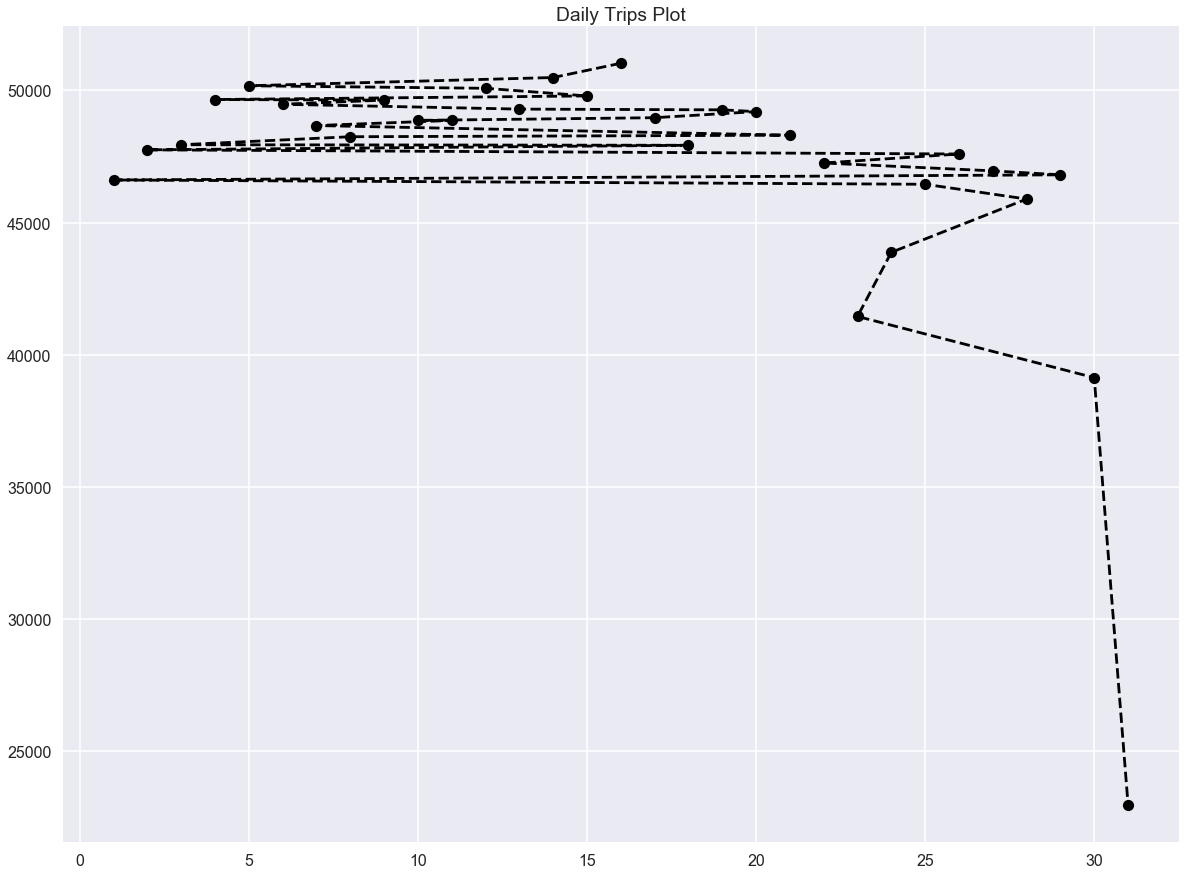

In [60]:
plt.figure(figsize=(20,15))
nyc_taxi['pickup_day'].value_counts().plot(color="black", linestyle="--", marker="o")
plt.title('Daily Trips Plot')

- Seem like New Yorker’s do not prefer to get a Taxi on Month end’s , there is a significant drop in the Taxi trip count as month end’s approach.

# Co-relation Heatmap

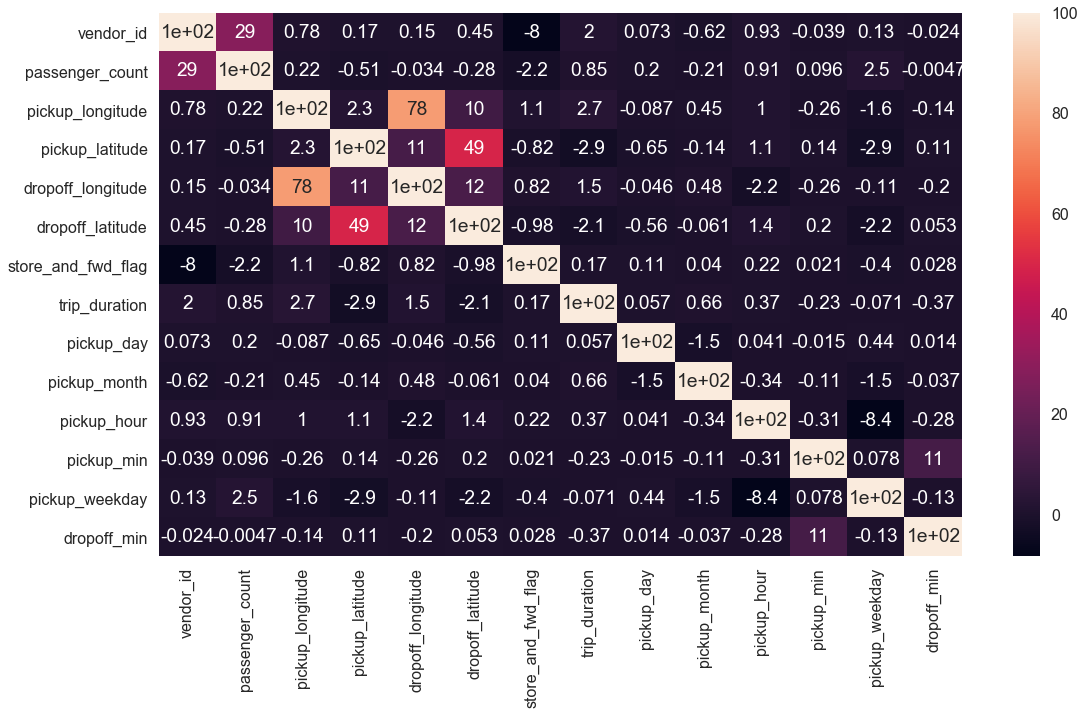

In [61]:
plt.figure(figsize=(18,10))
sns.heatmap(nyc_taxi.corr()*100, annot=True)

In [62]:
nyc_taxi = nyc_taxi.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)
nyc_taxi.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,17,24,0,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,0,43,6,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,35,1,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,19,32,2,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,13,30,5,38


- Let’s drop unwanted columns like ID, as it makes no sense and some other columns of which we have already fetched information separately.

# Normaization

In [63]:
#Predictors and Target Variable

X = nyc_taxi.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi['trip_duration'])

In [64]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

cols = X.columns

ss = StandardScaler()
#norm = Normalizer()
#mms = MinMaxScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471,-0.172813,-0.307440,0.530263,-0.322670,-1.561062,0.136139
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471,-0.402616,1.477173,-2.126116,0.774030,1.509502,1.399039
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471,0.401692,-1.497182,-0.407283,0.312262,-1.049301,-1.126761
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471,-1.092023,0.287431,0.842778,0.139099,-0.537541,0.537971
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471,1.206001,-0.307440,-0.094768,0.023657,0.997741,0.480566


Normalizing the Dataset using Standard Scaling Technique.


Now, Why Standard Scaling ? Why not MinMax or Normalizer ?


- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.


- While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

# The First Approach - Principal Component Analysis (PCA)

- Now that we’re done, we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.

In [72]:
X = new_df

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14409795, 0.10874783, 0.10046737, 0.08575584, 0.08327229,
       0.07812324, 0.07600604, 0.0757774 , 0.07020683, 0.06811033,
       0.05427252, 0.03908354, 0.01607881])

<Container object of 13 artists>

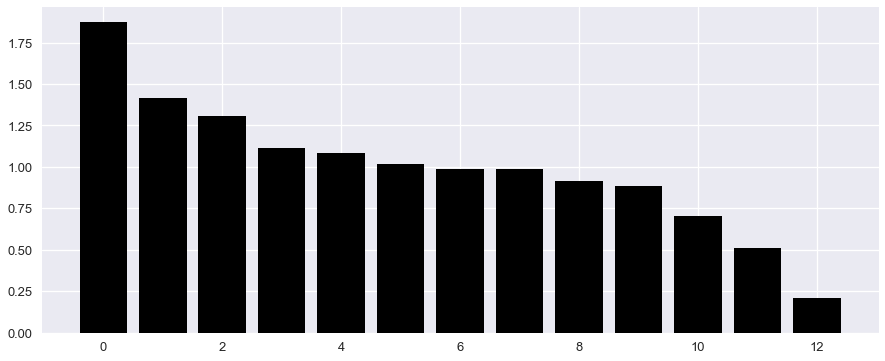

In [81]:
plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="black")

- At 12th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0,0.5,'Cumulative Variance Ratio')

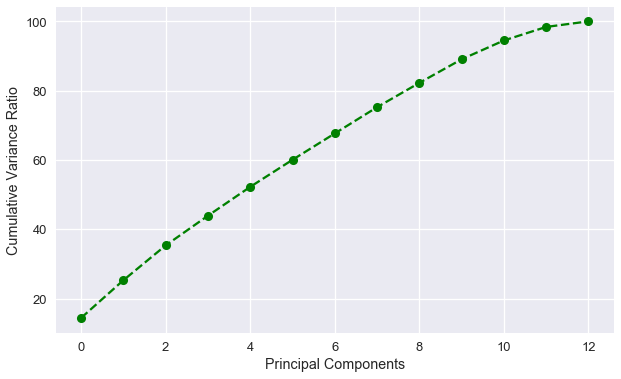

In [82]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", linestyle="--", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")

In [69]:
pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.87327459, 1.4137228 , 1.30607674, 1.11482673, 1.08254045,
       1.01560276, 0.98807923, 0.9851069 , 0.91268938, 0.88543493,
       0.70554326, 0.50808643])

- Now let us consider 12 as a required number of components and extract new features by trasnforming the Data.

([<matplotlib.axis.XTick at 0x1fc8a806b00>,
 <a list of 13 Text xticklabel objects>)

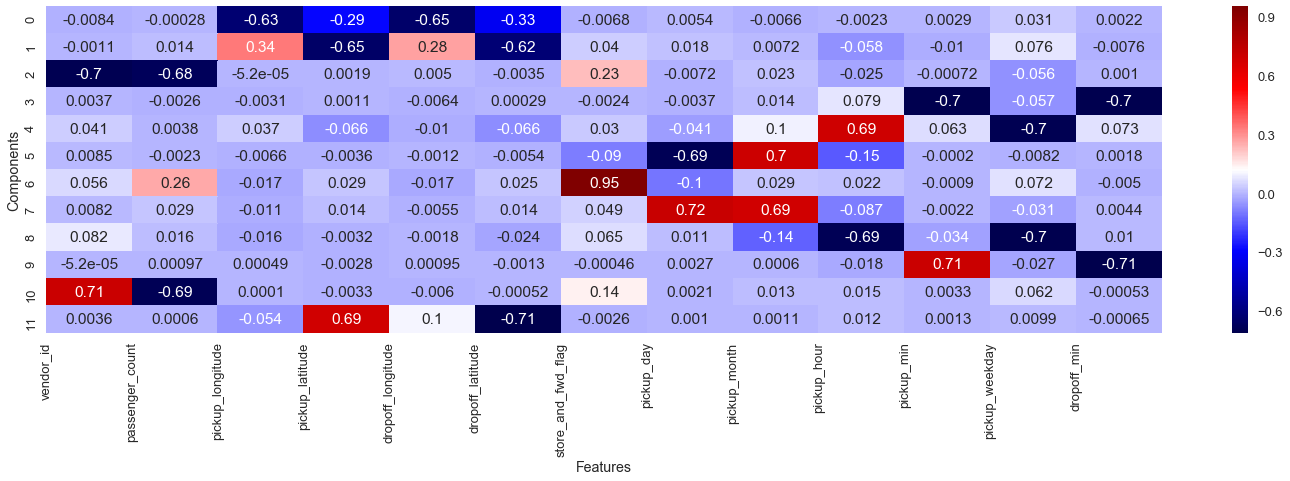

In [70]:
sns.set_context("talk")
plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="seismic")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=90)

# Linear Regression

- Let’s pass the PCA Transformed data in our Machine Learning Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (40%).

In [0]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi['trip_duration']).as_matrix()

- We have to consider RMSE as a evaluation Metrics , not R-squared. We can also hyper tune our Parameters to minimize the loss (RMSE). We will also calculate Null RMSE , which we can set as a benchmark for our Models RMSE.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
pred

array([6.32328104, 6.37618293, 6.49043933, ..., 6.48016468, 6.52877018,
       6.50631427])

In [33]:
lin_reg.intercept_, lin_reg.coef_

(6.4642683980121385,
 array([-1.40745025e-01,  1.79420917e-01, -1.33627040e-02,  8.11089338e-03,
         5.48887552e-02,  1.43327418e-02,  2.61141275e-03,  2.43124232e-02,
        -1.28707489e-02, -4.11236048e-03, -9.05190326e-05,  7.57391559e-03]))

Interpreting the coefficients:

- Holding all other Principal Components fixed, a 1 unit increase in 1st PC is associated with a decrease of -1.40 (0.03 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 2nd PC is associated with a increase of 1.79 (61.65 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 3rd PC is associated with a decrease of -1.33 (0.04 seconds)


- Holding all other Principal Components fixed, a 1 unit increase in 4th PC is associated with a increase of 8.11 (128824955.16 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 5th PC is associated with a increase of 5.48 (301995.17 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 6th PC is associated with a increase of 1.43 (26.91 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 7th PC is associated with a increase of 2.61 (407.38 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 8th PC is associated with a increase of 2.43 (269.15 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 9th PC is associated with a decrease of -1.28 (0.05 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 10th PC is associated with a decrease of -4.11 (0.00007 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 11th PC is associated with a decrease of -9.05 (8.91 seconds) in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 12th PC is associated with a increase of 7.57 (37153522.90 seconds) in Trip Duration.

What do we see incorrect ?

- A 1 unit increase in 4th component and 12th component are resulting in increment of 128824955.16 seconds (35784.70 Hours) and 37153522.90 seconds (10320.42 Hours). Those values are too high considering the Trip duration of a taxi , which cannot be that high.

In [34]:
print ("Training_score : " + str(lin_reg.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(lin_reg, X_train, y_train,cv=5).mean()))

lin_reg_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(lin_reg_r2))

lin_reg_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(lin_reg_rmse))

Training_score : 0.06356733264242109
Cross Validation Score : 0.06198878322838956
R2_Score : -3.5572812440369876
RMSE : 0.845575594470817


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

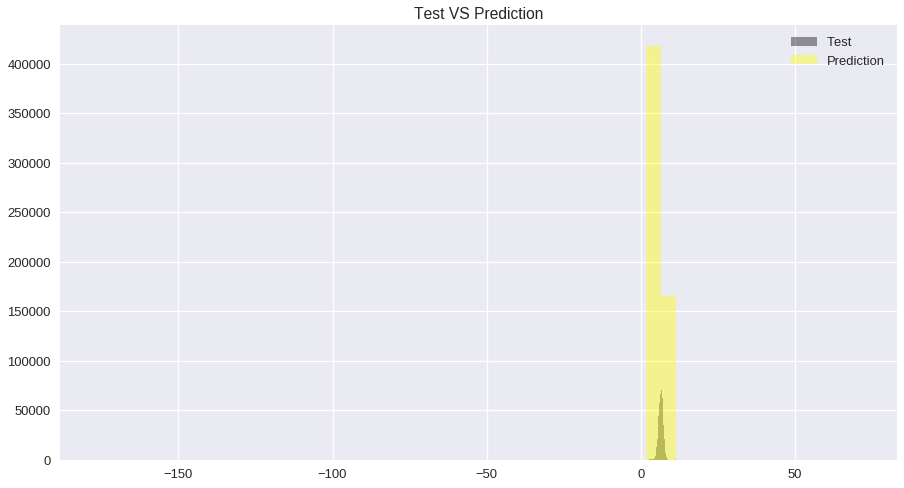

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="yellow", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in Grey) and Predicted values (in Yellow) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

# Null RMSE

- Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [36]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSE : " + str(np.sqrt(mean_squared_error(y_test, y_null))))

Null RMSE : 0.7987144307479092


# Decision Tree

- Let us apply Decision Tree on our data and see what prediction it does

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
model = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
pred

array([6.58052977, 7.51122233, 6.16034433, ..., 6.72750745, 6.36335234,
       7.0337328 ])

In [38]:
print ("Training_score : " + str(dt.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(dt, X_train, y_train,cv=5).mean()))

dt_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(dt_r2))

dt_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(dt_rmse))

Training_score : 0.9238278925731285
Cross Validation Score : 0.9132118423186084
R2_Score : 0.9052279150397456
RMSE : 0.23648218353100067


- Our Goal is to reduce the value of loss function (RMSE) as much as possible considering NULL RMSE into account, i.e, 0.7987

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

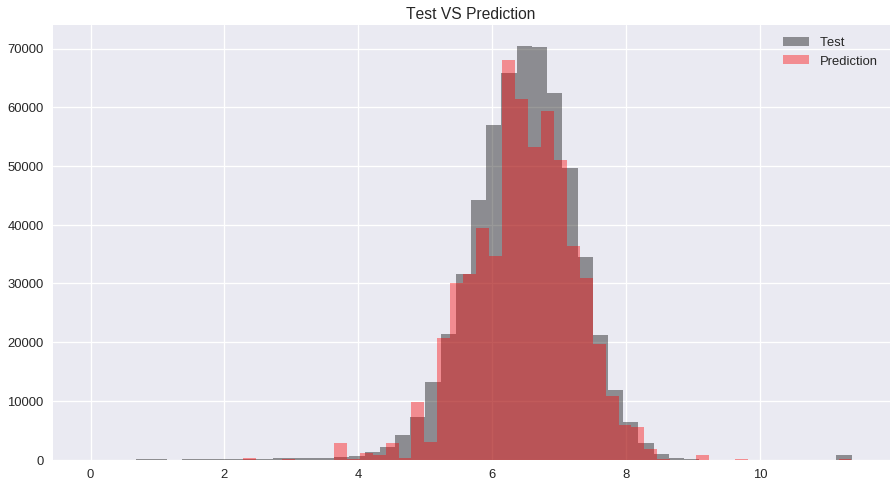

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="r", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

# Parameter Tuning Decision Tree

- We can perform some hyper tuning on our Algorithm to get the most out of it, Hyper Tuning might consume lot of time and resources of the system depending upon the how big the Data we have and what algorithm we're using. It will go through number of Iterations and try to come up with the best possible value for us. 

In [0]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None], "min_samples_split":[2,3,4,5], 'max_features':[5,6,7,8,9,10]}

grid = GridSearchCV(dt, params, cv=5)
grid.fit(X_train, y_train)
pred = grid.predict(X_test)
print (pred)
grid.best_params_

In [0]:
print ("R2_Score after parameter tuning : " + str(r2_score(pred, y_test)))

print ("RMSE after parameter tuning : " + str(np.sqrt(mean_squared_error(pred, y_test))))

# Random Forest 

- Now, Let us also try Random Forest on our Data and see what do we get.

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
model = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred

array([6.56425564, 7.51500054, 6.16283568, ..., 6.72435878, 6.36674563,
       7.01395373])

In [41]:
print ("Training_score : " + str(rf.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(rf, X_train, y_train,cv=5).mean()))

rf_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(rf_r2))

rf_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(rf_rmse))

Training_score : 0.9301504632018075
Cross Validation Score : 0.9238260204664023
R2_Score : 0.9145461804005263
RMSE : 0.223427297434528


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

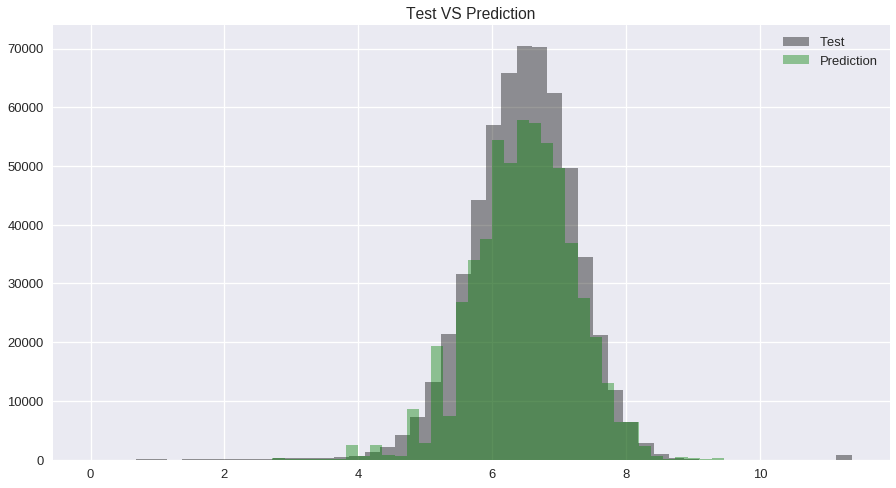

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.


- Similarly, we can Hyper tune Random Forest to get the most out of it.

# R2 Scores Evaluation

- R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).


- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. 

Text(0.5,1,'R2 Scores')

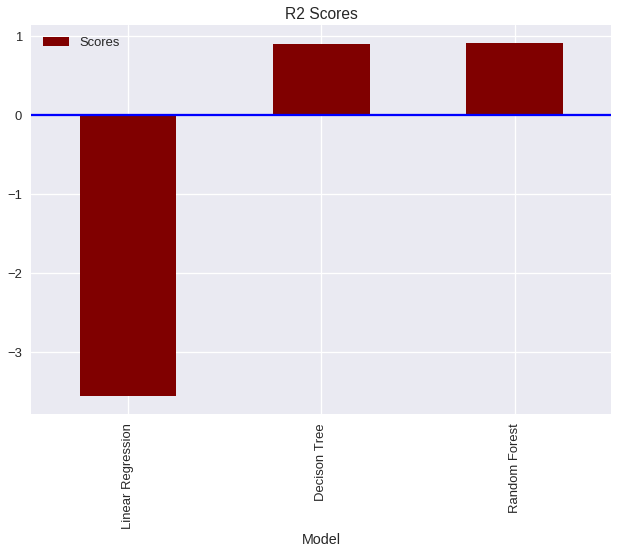

In [43]:
#r2 score plot for all 3 models

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([lin_reg_r2, dt_r2, rf_r2]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='blue')
plt.title("R2 Scores")

- We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0 

# RMSE Evaluation

-  RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.


- With RMSE we explicitly know how much our predictions deviate.


- Lower values of RMSE indicate better fit with lesser LOSS.

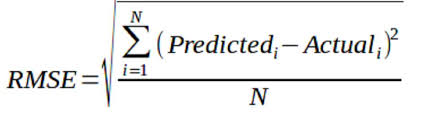

Text(0.5,1,'RMSE')

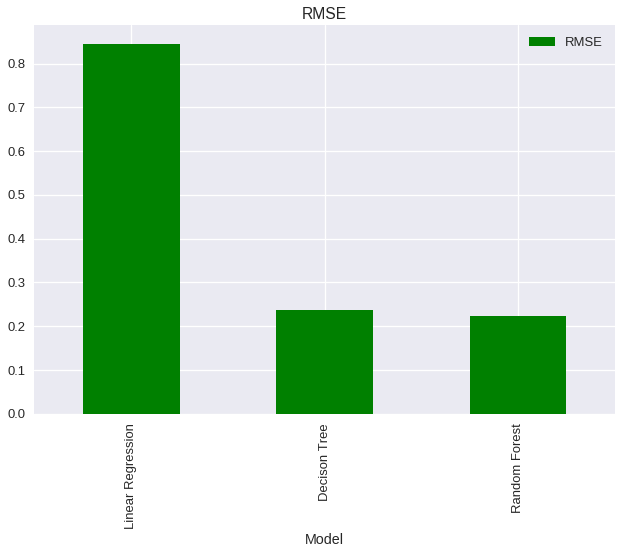

In [44]:
#RMSE plot

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'RMSE':np.array([lin_reg_rmse, dt_rmse, rf_rmse]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="green")
plt.title("RMSE")

- Remember our NULL RMSE : 0.7987 as a benchmark to beat.


- We can observe from above Viz. that our Decision Tree model and Random Forest model are good performers. As, Random Forest is providing us reduced RMSE, we can say that it's a model to Opt for.

# The Second Approach - Without PCA

- Another approach we could go with is without PCA, just Standard Scaling Dataset and applying our Algorithms.


- The approach can give us better idea of what works better for us.


- This approach might take great amount of computational resources and time, it will be good if we can run this on Google’s Collaboratory, that will eliminate huge computational stress on our system as the program will be running on Server’s end and will have their GPU / TPU coming to rescue us.

In [0]:
X = new_df
y = np.log(nyc_taxi['trip_duration'])

# Linear Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
pred

array([6.31591725, 6.40731382, 6.50345385, ..., 6.49069786, 6.50786604,
       6.55297763])

In [47]:
lin_reg.intercept_, lin_reg.coef_

(6.464275855923103,
 array([ 0.01161777,  0.01299954,  0.19621514, -0.06624612,  0.09526869,
        -0.07600704,  0.00813596,  0.00743483,  0.03621637,  0.03198005,
        -0.00702248, -0.01917126, -0.00054129]))

In [48]:
print ("Training_score : " + str(lin_reg.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(lin_reg, X_train, y_train,cv=5).mean()))

lin_reg_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(lin_reg_r2))

lin_reg_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(lin_reg_rmse))

Training_score : 0.06495440623981841
Cross Validation Score : 0.06342209407558178
R2_Score : -3.4938106677125873
RMSE : 0.8459249597834395


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

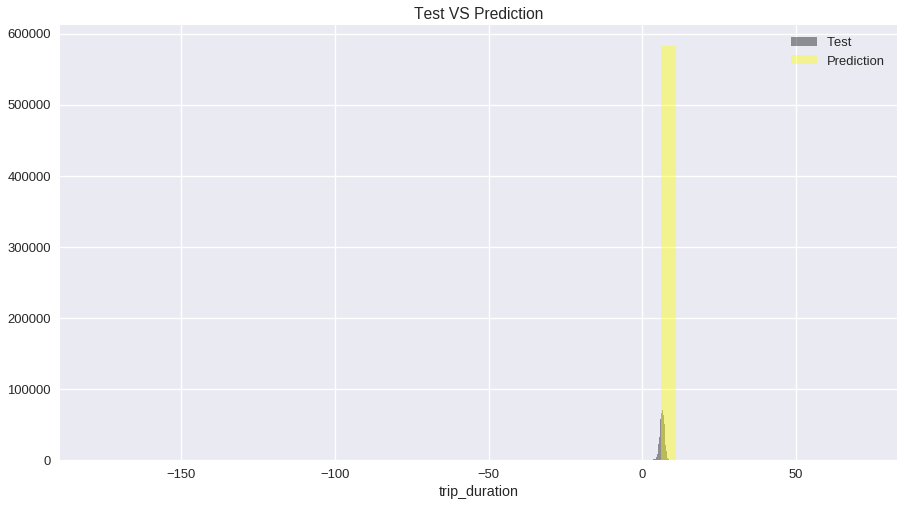

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="yellow", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Observations shows us that Linear Regression isn't performing well even with the second (without PCA) Approach.

# Null RMSE

In [52]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSE : " + str(np.sqrt(mean_squared_error(y_test, y_null))))

Null RMSE : 0.7987144307479092


# Decsion Tree

In [50]:
dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
model = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
pred

array([6.08224345, 7.20060855, 6.45506006, ..., 6.15618467, 6.88536689,
       7.07153921])

In [51]:
print ("Training_score : " + str(dt.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(dt, X_train, y_train,cv=5).mean()))

dt_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(dt_r2))

dt_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(dt_rmse))

Training_score : 0.4646456233867843
Cross Validation Score : 0.45694038044022334
R2_Score : -0.16778607720236516
RMSE : 0.5893142534265765


- This time our decision tree model is not trained well as we can identify from scores, training score and cross validation score is close to 0.45 compared to last model where it was around 0.92.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

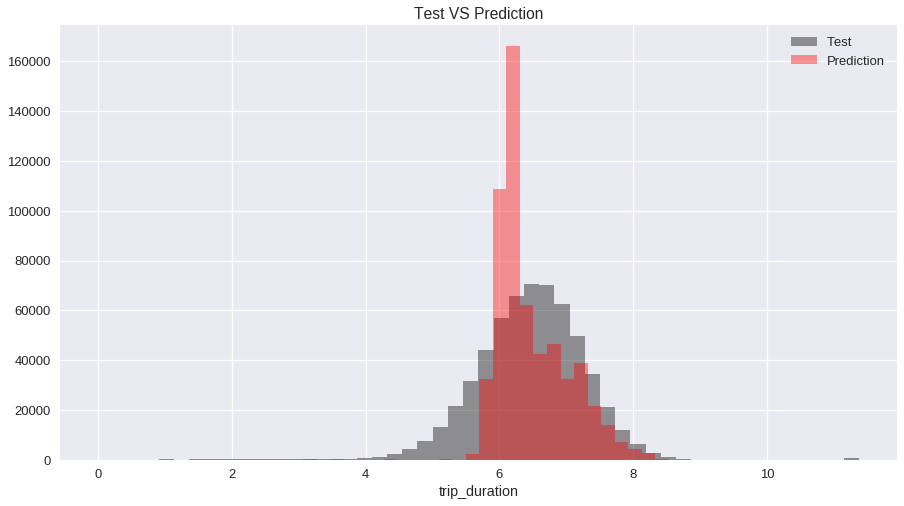

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="r", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Considering our Null RMSE 0.7987, this model gave us loss of 0.5893, we can say it is good but not the acceptable one, knowing the fact that we got RMSE of 0.2364 in previous 'with PCA' approach.

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
model = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred

array([6.19995148, 7.20044316, 6.19904207, ..., 6.15550727, 6.87938094,
       7.08992226])

In [55]:
print ("Training_score : " + str(rf.score(X_train, y_train)))

print ("Cross Validation Score : " + str(cross_val_score(rf, X_train, y_train,cv=5).mean()))

rf_r2 = r2_score(pred, y_test)
print ("R2_Score : " + str(rf_r2))

rf_rmse = np.sqrt(mean_squared_error(pred, y_test))
print ("RMSE : " + str(rf_rmse))

Training_score : 0.47907808111344413
Cross Validation Score : 0.46800268936330014
R2_Score : -0.18239868773729473
RMSE : 0.5804755543875743


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Test VS Prediction')

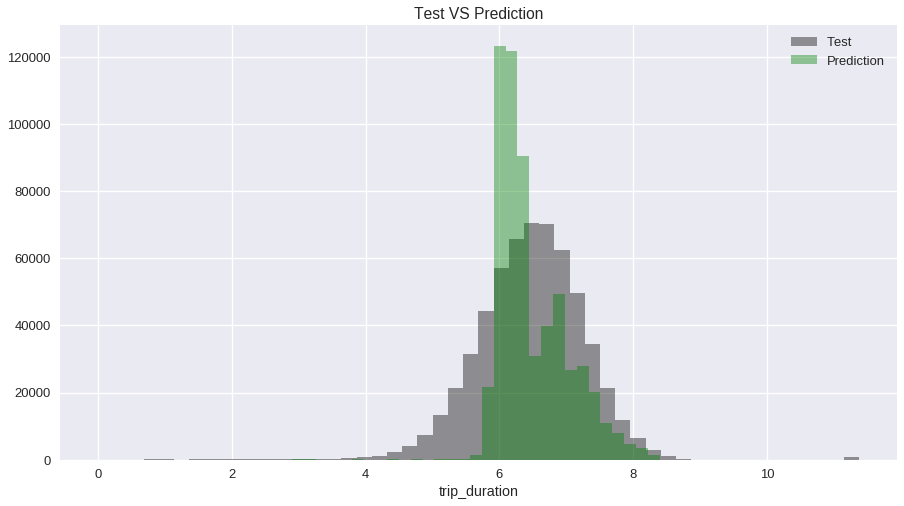

In [56]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Again the loss value we got here is 0.5804 is good when tried to match with Decision Tree's RMSE ,i.e, 0.5893. But still could be reduced by PCA Approach or maybe Hyper parameter tuning.

Text(0.5,1,'R2 Scores')

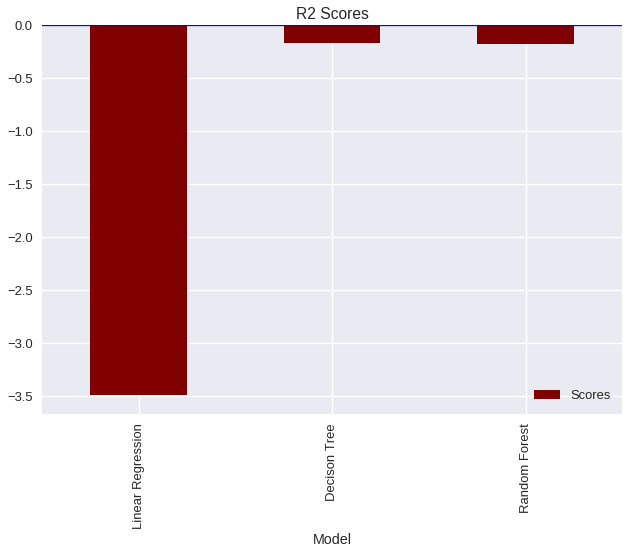

In [57]:
#r2 score plot for all 3 models

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([lin_reg_r2, dt_r2, rf_r2]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='blue')
plt.title("R2 Scores")

Text(0.5,1,'RMSE')

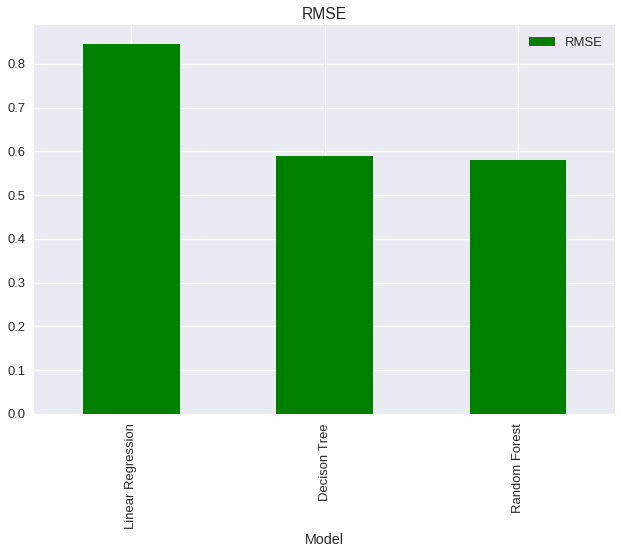

In [58]:
#RMSE plot

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'RMSE':np.array([lin_reg_rmse, dt_rmse, rf_rmse]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="green")
plt.title("RMSE")

# Insights:

- Observed which taxi service provider is most Frequently used by New Yorkers.


- Found out few trips which were going from 528 Hours to 972 Hours, possibly Outliers.


- With the help of Tableau, we’re able to make good use of Geographical Data provided in the Dataset to figure prominent Locations of Taxi’s pickup / dropoff points.


- Also, found out some Trips of which pickups dropoff point ended up somewhere in North Atlantic Sea. 


- Passenger count Analysis showed us that there were few trips with Zero Passengers.


- Monthly trip analysis gives us a insight of Month – March and April marking the highest number of Trips while January marking lowest, possibly due to Snowfall.


- In a day, we could observe that 4pm to 8pm is the time when New Yorkers Rush too much.


- Observations says that Friday’s and Saturday’s are those days in a week when New Yorkers prefer to get out of their home.

# Recommendations:

- Apply Standard Scaling on the Dataset to Normalize the values.


- Further, Apply PCA to reduce dimensions, as you’ll extract features from our primary DateTime Feature. Those additional features might lead our model to suffer from **“Curse of dimensionality”** and could drastically affect performance.


- Pass the PCA Transformed data in our ML Regression Algorithms and Evaluate results.